## Assignment 6
This assignment requires you to work with Facebook network data, data preprocessing and `networkx`. Note that this is real data from real people!

### Part 1: Preparing data

The dataset you will be working with is available here: https://snap.stanford.edu/data/egonets-Facebook.html

You're first job is to 
1. Download the data
2. Unpack the data
3. Import the data as an undirected graph in `networkx`

This should **all be done from your notebook in Python**. This is an important step for you to automate data preprocessing. 

Note: this could take a while, so if you feel adventurous you can use the `multiprocessing` library to speed things up.

Hand-in:
* The code for downloading, unpacking and loading the dataset

In [32]:
import requests

url = 'https://snap.stanford.edu/data/facebook_combined.txt.gz'
fname = "facebook_combined.txt.gz"
response = requests.get(url, allow_redirects=True)
if response.ok:
    with open(fname, "wb") as f:
        f.write(response.content)

In [33]:
%%bash
gzip -d facebook_combined.txt.gz

gzip: facebook_combined.txt already exists -- skipping


CalledProcessError: Command 'b'gzip -d facebook_combined.txt.gz\n'' returned non-zero exit status 1.

In [35]:
%%bash
ls -ltrh | tail

total 2192
-rw-r--r--  1 martin  staff   937B 21 Mar 16:31 requirements.txt
-rw-r--r--  1 martin  staff   834K 21 Mar 21:17 facebook_combined.txt
-rw-r--r--  1 martin  staff    40K 22 Mar 10:30 Assignment.ipynb
-rw-r--r--  1 martin  staff   213K 22 Mar 10:31 facebook_combined.txt.gz


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

G = nx.read_edgelist("facebook_combined.txt")

## Part 2: Analyse the data

Now, let's take a look at the network you imported. 

By *node degree* we mean the *number of edges to and from a node*. This is different in an undirected network, where in-degree == out-degree, and a directed network where in-degree != out-degree.

By *graph degree* we mean the *number of edges in the entire network*.

Hand-in code that display:
* The number of nodes in the network
* The number of edges in the network
* The average degree in the network
* A visualisation of the network inside your notebook

In [2]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


<function matplotlib.pyplot.show(*args, **kw)>

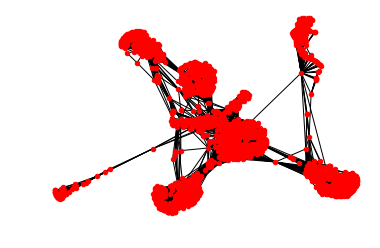

In [8]:
#A visualisation of the network inside your notebook
sp = nx.spring_layout(G)
plt.axis("off")
nx.draw_networkx(G,pos=sp, with_labels=False, node_size=20)
plt.show

## Part 3: Find the most popular people

We're naturally interested in who has the most friends, so we want to extract **top 10**. That is, the 10 most connected people.

Hand-in:
* Code that extracts and reports the 10 people with the most connections in the network

In [41]:
page_rank = nx.pagerank_numpy(G)

In [63]:
print("Top 10 people")
for i in range(10):
    print('Person {}'.format(page_rank.get(str(i))))

Top 10 people
Person 0.006224694804722866
Person 0.00023579423706064282
Person 0.00019932724987010194
Person 0.00022647413900788607
Person 0.00023287047204185023
Person 0.00020228939559439077
Person 0.00017538833026195836
Person 0.00026319310763254795
Person 0.00023065353858518406
Person 0.0006044411995048656
